# Step Forward Cross Validation for Bioactivity Predictions

## Implementation of Discovery Yield

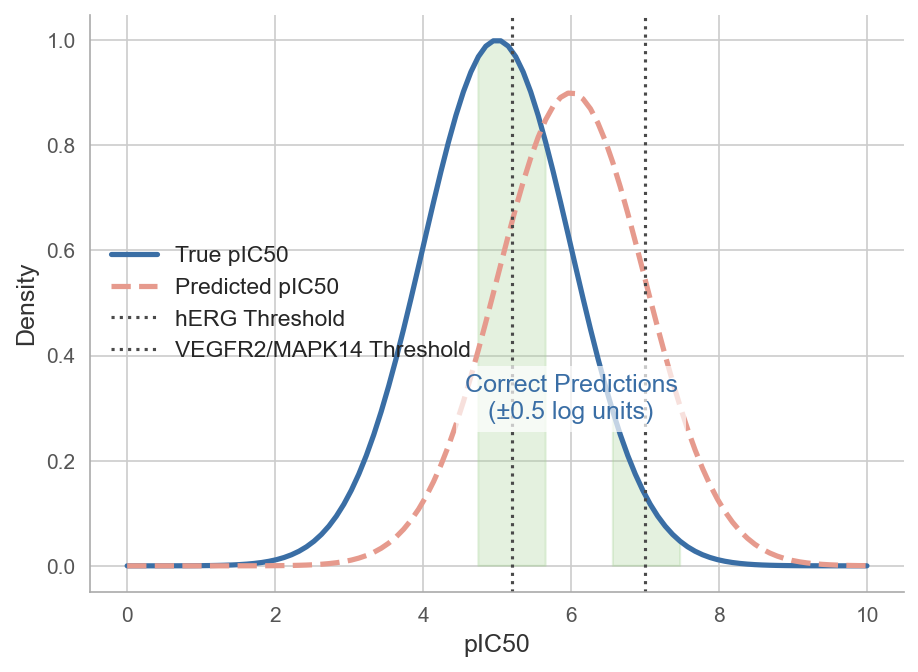

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y1 = np.exp(-0.5 * (x - 5) ** 2)
y2 = np.exp(-0.5 * (x - 6) ** 2) * 0.9

plt.figure(figsize=(7, 5), dpi=150)
plt.plot(x, y1, label="True pIC50", linewidth=2.5, color="#3A6EA5")  # Soft blue
plt.plot(x, y2, linestyle="dashed", label="Predicted pIC50", linewidth=2.5, color="#E69A8D")  # Soft red
plt.axvline(5.2, color="#4A4A4A", linestyle="dotted", linewidth=1.5, label="hERG Threshold")
plt.axvline(7.0, color="#4A4A4A", linestyle="dotted", linewidth=1.5, label="VEGFR2/MAPK14 Threshold")
plt.fill_between(x, 0, y1, where=((x >= 4.7) & (x <= 5.7)) | ((x >= 6.5) & (x <= 7.5)),
                 color="#A7D397", alpha=0.3)
plt.text(6.0, 0.28, "Correct Predictions\n(±0.5 log units)", fontsize=12,
         color="#3A6EA5", ha="center", bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))
plt.xlabel("pIC50", fontsize=12, color="#333333")
plt.ylabel("Density", fontsize=12, color="#333333")
plt.xticks(fontsize=10, color="#555555")
plt.yticks(fontsize=10, color="#555555")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#AAAAAA")
plt.gca().spines["bottom"].set_color("#AAAAAA")
plt.legend(frameon=False, fontsize=11)
plt.savefig("../benchmark/results/figures/discovery_yield.svg", format="svg", bbox_inches="tight")
plt.show()

This SVG was edited with Inkscape to produce illustration for discovery yield

Discovery Yield quantifies the fraction of discovery compounds (i.e., compounds classified as highly potent and/or safe) whose predicted  $pIC_{50}$  values are within an acceptable error range of their true values.

In [3]:
def compute_discovery_yield(df, target, true_col, pred_col, acceptable_err_range=0.5):
    if target == "hERG":
        discovery_mask = df[true_col] < 5.2
    else:
        discovery_mask = df[true_col] > 7.0

    discovery_df = df[discovery_mask]
    correct_predictions = (abs(discovery_df[pred_col] - discovery_df[true_col]) <= acceptable_err_range).sum()
    discovery_yield = correct_predictions / len(discovery_df) if len(discovery_df) > 0 else None
    return discovery_yield